In [1]:
import math
import random
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
%run '/Users/sabanejad/Projects/demand-response/functions.py'

In [5]:
total_usage = pd.read_parquet('total_usage.gzip')
total_acorn = pd.read_parquet('total_acorn.gzip')
tariffs = pd.read_parquet('tariffs.gzip')

In [32]:
total_usage_2011 = pd.read_parquet('total_usage_2011.gzip')
total_usage_2012 = pd.read_parquet('total_usage_2012.gzip')
total_usage_2013 = pd.read_parquet('total_usage_2013.gzip')
total_usage_2014 = pd.read_parquet('total_usage_2014.gzip')

In [30]:
# remove feb 29, 2012 from the 2012 data
total_usage_2012 = total_usage_2012.loc[(total_usage_2012['date_time'].dt.normalize() != '2012-02-29')]

In [34]:
df_2011_treatment, df_2011_control = split_t_c(total_usage_2011)
df_2012_treatment, df_2012_control = split_t_c(total_usage_2012)
df_2013_treatment, df_2013_control = split_t_c(total_usage_2013)
df_2014_treatment, df_2014_control = split_t_c(total_usage_2014)

In [8]:
matrix = total_usage.pivot_table(index='house_id', columns='date_time', values='KWH/hh')

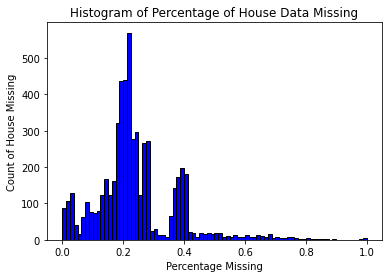

In [28]:
plt.hist(percentage_missing_house.values, color = 'blue', edgecolor = 'black', bins = 80)
plt.title('Histogram of Percentage of House Data Missing')
plt.xlabel('Percentage Missing')
plt.ylabel('Count of House Missing');

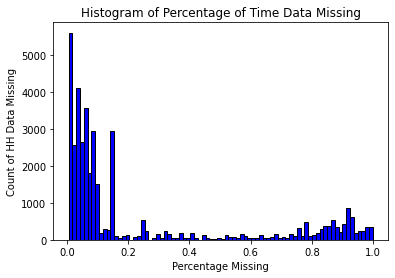

In [27]:
plt.hist(percentage_missing_time.values, color = 'blue', edgecolor = 'black', bins = 80)
plt.title('Histogram of Percentage of Time Data Missing')
plt.xlabel('Percentage Missing')
plt.ylabel('Count of HH Data Missing');

In [ ]:
# percentages instead of counts?

In [35]:
def get_dist(df):
    
    mat = df.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
    
    percentage_missing_house = matrix.isna().sum(axis=1) / matrix.shape[1]
    percentage_missing_time = matrix.isna().sum(axis=0) / matrix.shape[0]
    
    plt.hist(percentage_missing_house.values, color = 'blue', edgecolor = 'black', bins = 80)
    plt.title('Histogram of Percentage of House Data Missing')
    plt.xlabel('Percentage Missing')
    plt.ylabel('Count of House Missing');
    
    plt.hist(percentage_missing_time.values, color = 'blue', edgecolor = 'black', bins = 80)
    plt.title('Histogram of Percentage of Time Data Missing')
    plt.xlabel('Percentage Missing')
    plt.ylabel('Count of HH Data Missing');

    return percentage_missing_house, percentage_missing_time

In [51]:
a_2013_ = df_2013_control.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(a_2013_.shape)
a_2013_.dropna(inplace=True)
print(a_2013_.shape)

(4411, 17520)
(881, 17520)


In [52]:
a_2012_ = df_2012_control.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(a_2012_.shape)
a_2012_.dropna(inplace=True)
print(a_2012_.shape)

(4431, 17568)
(51, 17568)


In [53]:
b_2012_ = df_2012_treatment.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(b_2012_.shape)
b_2012_.dropna(inplace=True)
print(b_2012_.shape)

(1118, 17568)
(9, 17568)


In [48]:
a_2013_ = df_2013_control.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(a_2013_.shape)
a_2013_.dropna(axis=1, inplace=True)
print(a_2013_.shape)

(4411, 17520)
(4411, 0)


In [49]:
a_2012_ = df_2012_control.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(a_2012_.shape)
a_2012_.dropna(axis=1, inplace=True)
print(a_2012_.shape)

(4431, 17568)
(4431, 0)


In [50]:
b_2012_ = df_2012_treatment.pivot_table(index='house_id', columns='date_time', values='KWH/hh')
print(b_2012_.shape)
b_2012_.dropna(axis=1, inplace=True)
print(b_2012_.shape)

(1118, 17568)
(1118, 0)
